**ОПИСАНИЕ ПРОЕКТА**

В интернет-магазине проводится A/B-тестирование с целью увеличить выручку. Необходимо:
1. приоритизировать гипотезы:

- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать и объяснить, как изменилась приоритизация гипотез при применении RICE вместо ICE. 

2. проанализировать результаты A/B-теста:
- Построить график кумулятивной выручки и среднего чека по группам;
- Построить график относительного изменения кумулятивного среднего чека и комулятивной конверсии группы B к группе A;
- Постройте точечный график количества и стоимости заказов по пользователям;
- Посчитать 95-й и 99-й перцентили количества и стоимости заказов на пользователя. Выбрать границу для определения аномальных пользователей;
- Посчитать статистическую значимость различий в конверсии и среднем чеке заказа между группами по «сырым» данным;
- Посчитать статистическую значимость различий в конверсии и среднем чеке заказа между группами по «очищенным» данным;
- Принять решение по результатам теста.

Исходные данные: 
1. список и описание гипотез:
- 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort.
2. файлы с результатами A/B-теста

## Приоритизация гипотез.

In [1]:
# импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats as st
import scipy.stats as stats
import datetime as dt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# чтение файла hypothesis.csv и сохранение в переменной df
if os.path.exists('/datasets/hypothesis.csv'):
    df = pd.read_csv('/datasets/hypothesis.csv', sep = ',')
else:
    df = pd.read_csv('hypothesis.csv', sep = ',')

In [4]:
# Добавим опцию, чтобы отобразить все данные в таблицах
pd.options.display.max_colwidth = 210

In [5]:
df

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Согласно документации к данным:

* Hypothesis — краткое описание гипотезы;

* Reach — охват пользователей по 10-балльной шкале;

* Impact — влияние на пользователей по 10-балльной шкале;

* Confidence — уверенность в гипотезе по 10-балльной шкале;

* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Для подсчета приотизации гипотез, есть два популярных способа: 
* ICE SCORE = (Impact x Confidence) / Efforts 
* RICE SCORE = (Reach x Impact x Confidence) / Efforts

где 
* Reach — скольких пользователей затронет изменение, которое вы хотите внести;
* Impact — насколько сильно изменение повлияет на пользователей, их опыт и удовлетворение от продукта;
* Confidence — насколько вы уверены, что это изменение повлияет на пользователей именно так;
* Efforts — сколько стоит протестировать эту гипотезу.


In [6]:
#Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
df['Ice'] = (df['Impact']*df['Confidence'])/df['Efforts']
df[['Hypothesis', 'Ice']].sort_values('Ice', ascending=False)

,Hypothesis,Ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


In [7]:
#Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
df['Rice'] = (df['Reach']*df['Impact']*df['Confidence'])/df['Efforts']
df[['Hypothesis', 'Rice']].sort_values('Rice', ascending=False)


,Hypothesis,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [8]:
df[['Hypothesis', 'Ice', 'Rice']].sort_values(by=['Rice', 'Ice'], ascending=False)

,Hypothesis,Ice,Rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000,3.0


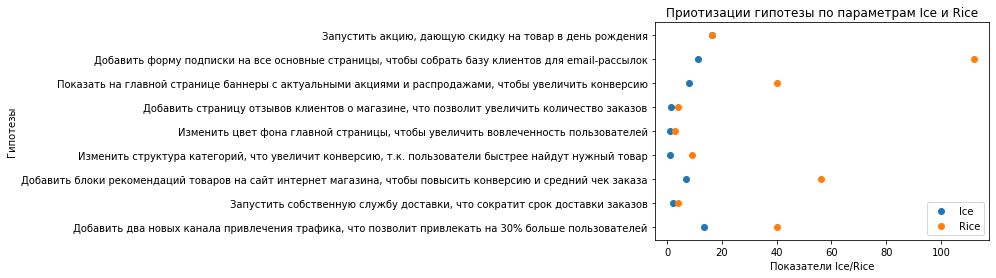

In [9]:
# Построим точечную диаграмму приотизации гипотезы по параметрам Ice и Rice
plt.scatter( df['Ice'], df['Hypothesis']) 
plt.scatter( df['Rice'], df['Hypothesis']) 
plt.title('Приотизации гипотезы по параметрам Ice и Rice') 
plt.xlabel('Показатели Ice/Rice')
plt.ylabel('Гипотезы')
plt.legend(["Ice" , "Rice"])

### Вывод:

При применении фреймворка RICE вместо ICE, приотизация гипотез изменилась:

* 8 гипотеза опустилась на пятое место с первого

* 7 гипотеза с треьего места поднялась на первое

* 2 гипотеза поднялась с пятого места на второе

* 0 гипотеза, почти не изменилась в приотизации - со второго опустилась на третье место

* 6ая и 4ая не изменили своего положения в приотизации

Данное изменение произошло предположительно, потому что в RICE добавился компонент Reach (т.е. скольких пользователей затронет изменение, которое вы хотите внести) и если мы рассмотри 8 гипотезу ("Запустить акцию, дающую скидку на товар в день рождения") и 7 гипотезу ('Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок') 7 гипотеза охватит больше пользователей чем 8ая, скорее всего по этому одна и поднялась в приотизации. Анологично если мы возьмем гипотезу 2 ('Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа') его охват будет больше, чем просто компонет Impact показывающий, насколько сильно изменение повлияет на охваченных пользователей.

## Анализ A/B-теста

In [10]:
# чтение файла orders.csv и сохранение в переменной orders
if os.path.exists('/datasets/orders.csv'):
    orders = pd.read_csv('/datasets/orders.csv', sep = ',')
else:
    orders = pd.read_csv('orders.csv', sep = ',')

In [11]:
#просмотр первых 5 строк
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


Согласно документации к данным:

* transactionId — идентификатор заказа; 

* visitorId — идентификатор пользователя, совершившего заказ;

* date — дата, когда был совершён заказ;

* revenue — выручка заказа;

* group — группа A/B-теста, в которую попал заказ.

In [12]:
#Посмотрим общую информацию о таблице orders
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


пропусков нет, столбец с датой, необходимо перевести в тип datetime


In [13]:
# переведем дату в тип datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [14]:
# чтение файла visitors.csv и сохранение в переменной visitors
if os.path.exists('/datasets/visitors.csv'):
    visitors = pd.read_csv('/datasets/visitors.csv', sep = ',')
else:
    visitors = pd.read_csv('visitors.csv', sep = ',')

In [15]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Согласно документации к данным:

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

In [16]:
# посмотрим сколько пользователей в каждой группе
fraction = visitors.groupby('group').agg({'visitors':'sum'})
fraction

,visitors
group,
A,18736
B,18916


Пользователи поделены не ровно 50/50. Разница составила 0,96%. Относительно различие кол-ва пользователей равно 4%. Стоит понимать, что результаты теста могут быть некорректны.

In [17]:
#Посмотрим общую информацию о таблице orders visitors
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


пропусков нет, столбец с датой, необходимо перевести в тип datetime

In [18]:
# переведем дату в тип datetime
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

### Построим графики кумулятивной выручки по группам и кумулятивного среднего чека по группам

In [19]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups.head()

,date,group
0,2019-08-15,B
2,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [20]:
# Получим строки таблицы orders, дата которых меньше или равна дате элемента из datesGroups, а группа теста равна группе из datesGroups
ordersAggregated = (datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])) 
ordersAggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [21]:
# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = (datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])) 


In [22]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

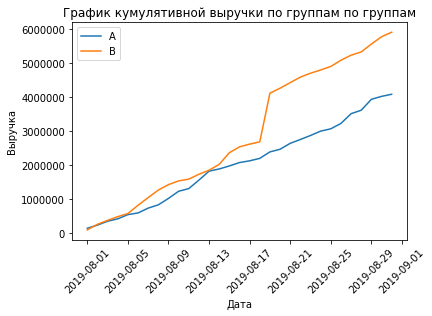

In [25]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам по группам') 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend() 
plt.xticks(rotation = 45)

#### Вывод

Выручка почти равномерно увеличивается в течение всего теста. Хороший знак. Однако график выручки группы В в одной точке резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. 

(array([737272., 737276., 737280., 737284., 737288., 737292., 737296.,
        737300., 737303.]),
 <a list of 9 Text xticklabel objects>)

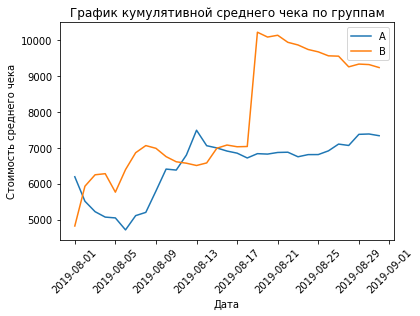

In [26]:
# Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('График кумулятивной среднего чека по группам') 
plt.xlabel('Дата')
plt.ylabel('Стоимость среднего чека')
plt.xticks(rotation = 45)

#### Вывод

Средний чек к концу теста так и не пришел к равномерному распределению. Возможно, в группу B в середине теста попали крупные заказы (резкий всплеск на графике). В группе А в с 5 по 13 августа тоже есть всплески, но не такие резкие как в В. Необходимо больше данных, чтобы прийти к реальному среднему чеку и остановиться на его уровне.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0, 0.5, 'Относительный прирост')

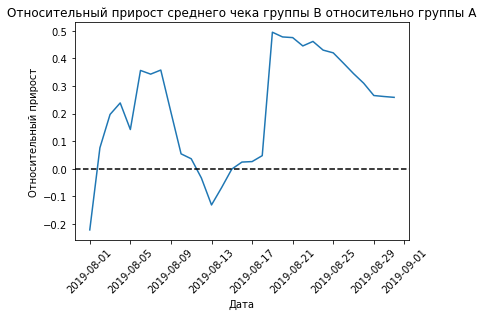

In [28]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.title('Относительный прирост среднего чека группы B относительно группы A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45) 
plt.xlabel('Дата')
plt.ylabel('Относительный прирост')

#### Вывод:

В нескольких точках график различия между сегментами резко «скачет». Где-то скорее всего спрятались крупные заказы и выбросы! 

### Построим график кумулятивной конверсии по группам. 

In [29]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

In [30]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

Text(0, 0.5, 'Конверсия')

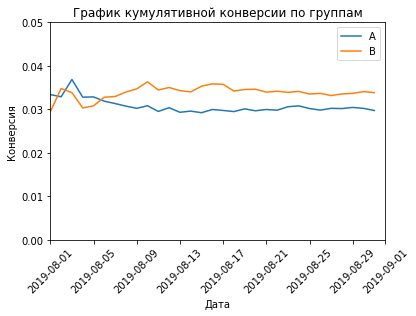

In [31]:
# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation = 45)
# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])
plt.title('График кумулятивной конверсии по группам') 
plt.xlabel('Дата')
plt.ylabel('Конверсия')

#### Вывод:

Не симметричный график. Конверсия группы В вырвалась вперёд и зафиксировалась, а конверсия группы А просела и также зафиксировалась.

### Построим график относительного изменения кумулятивной конверсии группы B к группе A.

Text(0, 0.5, 'Прирост конверсии')

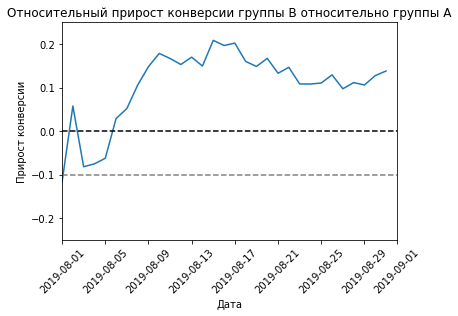

In [32]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.25])
plt.xlabel('Дата')
plt.ylabel('Прирост конверсии')

#### Вывод:

В начале теста группа B имела скачки по отношению к группе A, затем вырвалась вперёд и теперь с небольшими падениями продолжает постепенно расти.
В целом отношение конверсии установилось и продолжает расти.

### Построим точечные графики количества заказов по пользователям и стоимостей заказов

In [33]:
# Подсчитаем количество заказов по пользователям 
ordersByUsers = (orders.groupby('visitorId', as_index=False)
                       .agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,userId,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


Text(0, 0.5, 'Кол-во заказов')

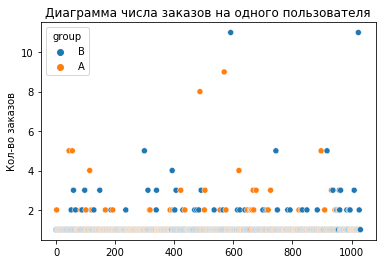

In [34]:
# Построим точечную диаграмму числа заказов на одного пользователя по группам:
x_values = pd.Series(range(0,len(ordersByUsers)))
sns.scatterplot(x=x_values, y=ordersByUsers['orders'], hue=orders['group']) 
plt.title('Диаграмма числа заказов на одного пользователя') 
plt.ylabel('Кол-во заказов')

Много пользователей с 2-4 заказами. Их точная доля не ясна — непонятно, считать их аномалиями или нет. Выбросов у обоих групп примерно одинаково.

In [35]:
# Посчитаем выборочные перцентили количества заказов на одного пользователя:
np.percentile(ordersByUsers['orders'], [95, 99])

array([2., 4.])

#### Вывод:

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более четырех раз.
Выберем 3 заказа на одного пользователя за верхнюю границу числа заказов, и отсеять аномальных пользователей по ней.

Text(0, 0.5, 'Выручка заказов')

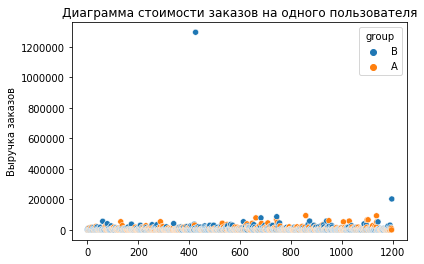

In [36]:
# Построим точечную диаграмму выручки заказов по группам:
x_values = pd.Series(range(0,len(orders['revenue'])))
sns.scatterplot(x=x_values, y=orders['revenue'], hue=orders['group'])
plt.title('Диаграмма стоимости заказов на одного пользователя') 
plt.ylabel('Выручка заказов')

Text(0, 0.5, 'Выручка заказов')

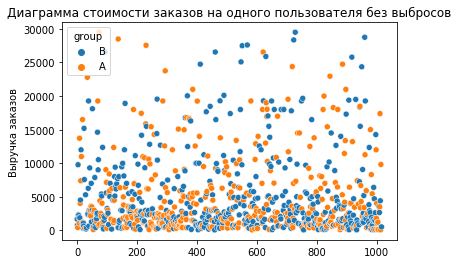

In [37]:
# создадим переменную в котором отберем кол-во заказов больше 3
anomalies = orders.groupby('visitorId', as_index = False).nunique().query('transactionId >2')['visitorId']
# дальше отфильтруем таблицу orders, где кол-во заказов меньше 3 и стоимость заказа до 30 000 рублей
orders_clean = orders.query('visitorId not in @anomalies and revenue <= 30000')
x_values = pd.Series(range(0,len(orders_clean['revenue'])))
sns.scatterplot(x=x_values, y=orders_clean['revenue'], hue=orders_clean['group'])
plt.title('Диаграмма стоимости заказов на одного пользователя без выбросов') 
plt.ylabel('Выручка заказов')

Есть немного дорогих заказов. Аномально дорогие заказы присутствуют только у группы В.

По графику можно выбрать границу аномальных заказов от 200000 и более.

В графике без аномалий видно распределение заказов нормальное, чем выше стоимость, тем меьше заказов.

In [38]:
# Посчитаем выборочные перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

#### Вывод

Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Выберем 30000 рублей на за верхнюю границу стоимости заказов, и отсеим аномальных пользователей по ней.

### Посчитаем статистическую значимость различий в конверсии и в среднем чеке заказа между группами по «сырым» данным.

Подготовим данные, создадим таблицу data со следующими столбцами:

* date — дата;
* ordersPerDateA — количество заказов в выбранную дату в группе A;
* revenuePerDateA — суммарная выручка в выбранную дату в группе A;
* ordersPerDateB — количество заказов в выбранную дату в группе B;
* revenuePerDateB — суммарная выручка в выбранную дату в группе B;
* ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
* revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
* ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
* revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
* visitorsPerDateA — количество пользователей в выбранную дату в группе A;
* visitorsPerDateB — количество пользователей в выбранную дату в группе B;
* visitorsCummulativeA — количество пользователей до выбранной даты включительно в группе A

In [39]:
# подготовка данных
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


Посчитаем статистическую значимость различия в среднем количестве заказов между группами.
Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['userId', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.


In [40]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули

In [41]:
# переменная sampleA и sampleB состоят из списка с количеством заказов для каждого из пользователей: ordersByUsersA['orders'] 
# и из нулей для пользователей, которые ничего не заказывали. Их количество равно разнице между суммой посетителей и 
# кол-ом записей о заказах
# с помощью pd.concat() объединим объекты Series по сторокам

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,)

**Нулевая гипотеза**: различий в среднем количестве заказов между группами нет.

**Альтернативная гипотеза**: различия в среднем количестве заказов между группами есть.

Число элементов sampleA — это количество пользователей, сумма всех элементов — количество заказов. Чтобы получить среднее число заказов на пользователя, поделим сумму заказов на число пользователей — найдём среднее в выборке sampleA методом mean(). Аналогично найдём среднее группы B: SampleB.mean().
Выведем относительный прирост среднего числа заказов группы B.

In [42]:
"p-value={0:f}".format(stats.mannwhitneyu(sampleA, sampleB)[1])

'p-value=0.008396'

In [43]:
"Относительный выигрыш В/А={0:.3f}".format(sampleB.mean() / sampleA.mean() - 1)

'Относительный выигрыш В/А=0.138'

#### Вывод

По «сырым» данным есть различия в среднем числе заказов групп A и B.
Первое число — p-value = 0.008 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем. Однако относительный выигрыш группы B равен 13,8% — второе число в выводе.


Теперь проверим статистическую значимость различий в среднем чеке между сегментами.

**Нулевая гипотеза**: различий в среднем чеке между группами нет. 

**Альтернативная гипотеза**: различия в среднем чеке между группами есть.


In [44]:
# Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() 
# данные о выручке с заказов 
'p-value={0:f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1])

'p-value=0.364645'

In [45]:
#  найдём относительные различия в среднем чеке между группами
'Относительный выигрыш В/А={0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1) 

'Относительный выигрыш В/А=0.259'

#### Вывод

P-value значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно выше среднего чека группы A.

### Посчитаем статистическую значимость различий в конверсии и среднему чеку между группами по «очищенным» данным

Найденные ранее 95-й и 99-й перцентили средних чеков равны 28000 и 58233.2 рублям. 

А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.


Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 28 000 рублей. 

Так мы уберём до 5% пользователей с наибольшим числом заказов и от до 5% пользователей с дорогими заказами. 

Сделаем срезы пользователей с числом заказов больше 2 — usersWithManyOrders и пользователей, совершивших заказы дороже 28 000 — usersWithExpensiveOrders. 

Объединим их в таблице abnormalUsers.


In [46]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > ordersByUsersA.orders.quantile(0.95)]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > ordersByUsersA.orders.quantile(0.95)]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > orders.revenue.quantile(0.95)]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
abnormalUsers.head()

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64

In [47]:
# Узнаем, сколько всего аномальных пользователей атрибутом shape
abnormalUsers.shape[0] 

74

74 аномальных пользователей

In [48]:
# Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным.
# Сначала подготовим выборки количества заказов по пользователям по группам теста
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

In [49]:
# Применим статистический критерий Манна-Уитни к полученным выборкам
'p-value={0:f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])

'p-value=0.006521'

In [50]:
'Относительный выигрыш В/А={0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)

'Относительный выигрыш В/А=0.173'

#### Вывод

Результаты по среднему количеству заказов практически не изменились

In [51]:
# посмотрим на результаты со средним чеком
'p-value={0:f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )


'p-value=0.369241'

In [52]:
display(
    "Относительный выигрыш В/А={0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 


'Относительный выигрыш В/А=-0.020'

#### Вывод

P-value увеличился, но и разница между сегментами сократилась с 25,9% до -2%.

Выбросы очень сильно повлияли на относительную разницу.

**По очищенным данным построим график относительного различия для среднего чека
и график относительного различия кумулятивных конверсий без анамалий, аналогично как мы делали это выше**

In [53]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups_clean = orders_clean[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated_clean = datesGroups_clean.apply(lambda x: orders_clean[np.logical_and(orders_clean['date'] <= x['date'], orders_clean['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated_clean = datesGroups_clean.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData_clean = ordersAggregated_clean.merge(visitorsAggregated_clean, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData_clean.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData_clean.head(5)) 


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      18      17   112340       719
1 2019-08-01     B      19      19    78258       713
2 2019-08-02     A      37      35   204472      1338
3 2019-08-02     B      40      39   171492      1294
4 2019-08-03     A      61      59   316945      1845


In [54]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA_clean = cumulativeData_clean[cumulativeData['group']=='A'][['date','revenue', 'orders']]
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB_clean = cumulativeData_clean[cumulativeData['group']=='B'][['date','revenue', 'orders']]
# собираем данные в одном датафрейме
mergedCumulativeRevenue_clean = cumulativeRevenueA_clean.merge(cumulativeRevenueB_clean, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

Text(0.5, 0, 'Дата')

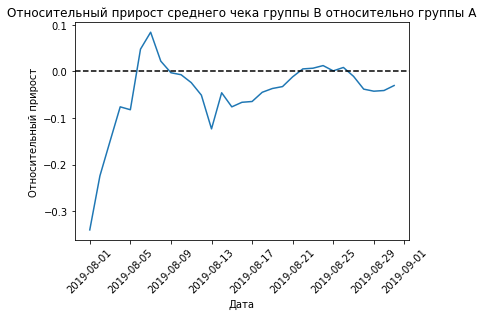

In [55]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue_clean['date'], (mergedCumulativeRevenue_clean['revenueB']/mergedCumulativeRevenue_clean['ordersB'])/(mergedCumulativeRevenue_clean['revenueA']/mergedCumulativeRevenue_clean['ordersA'])-1)
plt.title('Относительный прирост среднего чека группы B относительно группы A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--') 
plt.xticks(rotation = 45)
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')

In [56]:
# считаем кумулятивную конверсию
cumulativeData_clean['conversion'] = cumulativeData_clean['orders']/cumulativeData_clean['visitors']
# отделяем данные по группе A
cumulativeDataA_clean = cumulativeData_clean[cumulativeData_clean['group']=='A']

# отделяем данные по группе B
cumulativeDataB_clean = cumulativeData_clean[cumulativeData_clean['group']=='B']


Text(0.5, 0, 'Дата')

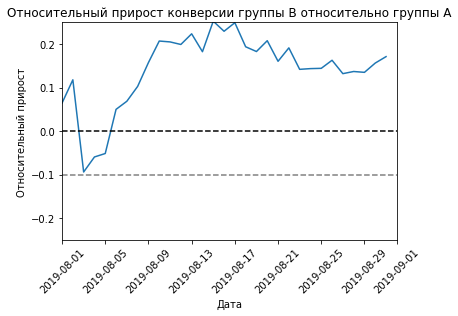

In [57]:
mergedCumulativeConversions_clean = cumulativeDataA_clean[['date','conversion']].merge(cumulativeDataB_clean[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions_clean['date'], mergedCumulativeConversions_clean['conversionB']/mergedCumulativeConversions_clean['conversionA']-1)

plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation = 45)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), -0.25, 0.25]) 
plt.ylabel('Относительный прирост')
plt.xlabel('Дата')

### Выводы по А/В-тесту

1. Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
2. По сырым данным нет статистически значимого различия по среднему чеку между группами. 
3. График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту.
4. График различия среднего чека до фильтрации аномалий колеблется: именно благодаря ему мы нашли аномалии. Сделать из этого графика определённые выводы нельзя.
5. График различия среднего чека после фильтрации постепенно стабилизировался около 0 - значимых различий между средними чеками в разных группах нет.

**Проанализировав тест, можно сказать, что группа B как минимум не хуже группы А: конверсия статистически выше, а разницы по среднему чеку нет. Поэтому тут можно или же выкатить группу B как победителя или же остановить тест и начать сначала определив новую продолжительность и размер выборки.**